<a href="https://colab.research.google.com/github/goodbyeskyharbor/PHYS308-notebook-solutions/blob/main/Solutions-to-Homework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4 - Monte Carlo methods and random walks

#### Problem 1 - Estimating the value of pi

Estimate the value of pi using a Monte Carlo method. The equation for a circle with radius=1 is $x^2+y^2 = 1$. If we randomly pick an x-value and a y-value between -1 and 1 there is some probability that the (x,y) point will be located within that circle ($x^2+y^2 \le 1$) and some probability it will lie outside of that circle. If we randomly pick thousands of points we can measure the ratio of points which lie inside the circle to the total number of points. All of the points will lie within a square with corners (1,1), (1,-1), (-1,-1), (-1,1) which corresponds to s square with sides of length 2. Therefore we know the area of the square to be 4. If we multiple the ratio of points within the circle by the area of the square, we will estimate the area of the circle. The area of our circle should be $\pi r^2 = \pi (1)^2 = \pi$, so in doing so we will be estimating the value of pi.

<img src="https://github.com/jdolen/PurdueNorthwest_PHYS308_ScientificComputing1/raw/master/Homework/Problem_Images/MonteCarloIntegration.png">


1. Write code which randomly generates 10000 (x,y) points in order to estiatmate the area of a circle as described above.

2. For each iteration n (for each randomly generated point) estimate your current value of pi and append this value to a list. Plot this estimated value of pi vs n. Also plot a line corresponding to the known value of pi. You should see that as n increases your estimate approaches the known value of pi.

3. Track the position of each randomly generated point by appending each x and y value to two lists. Also track the position of each point which lies within the circle. Draw each point in order to recreate the plot shown above.



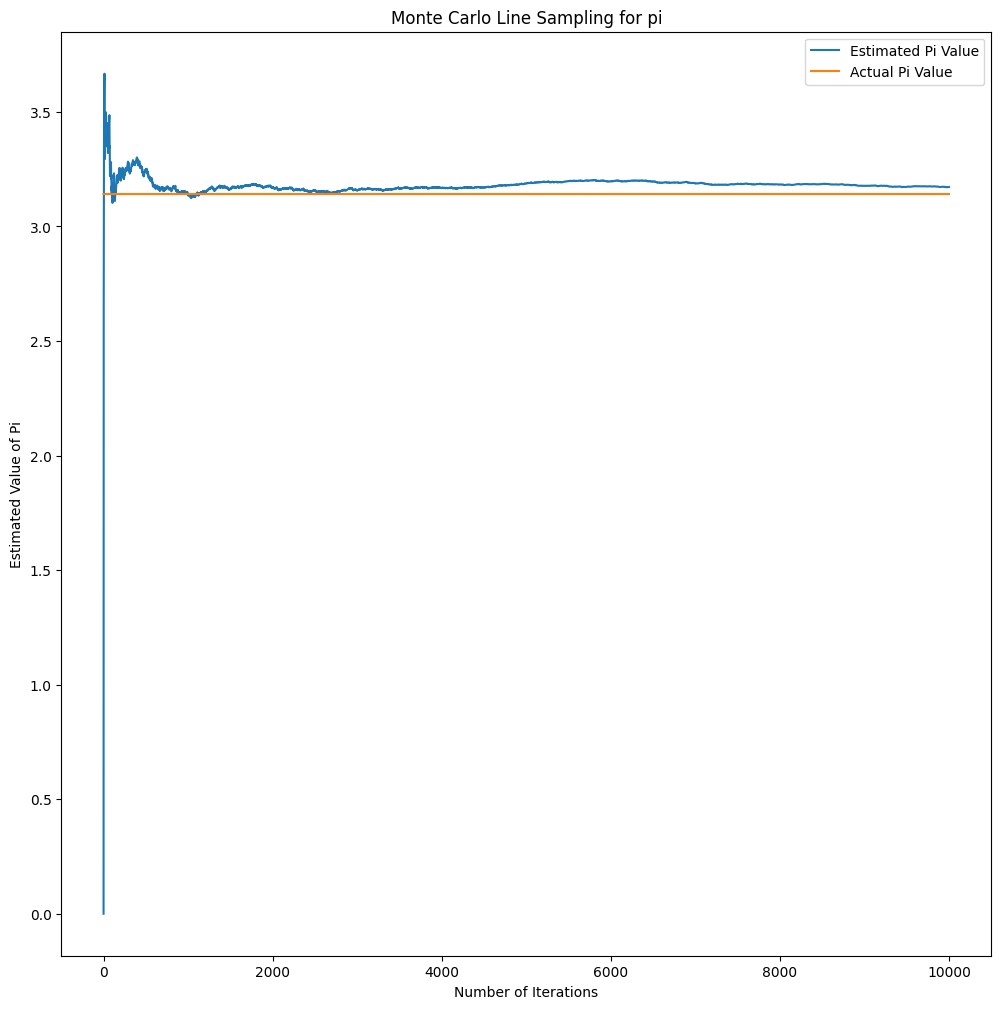

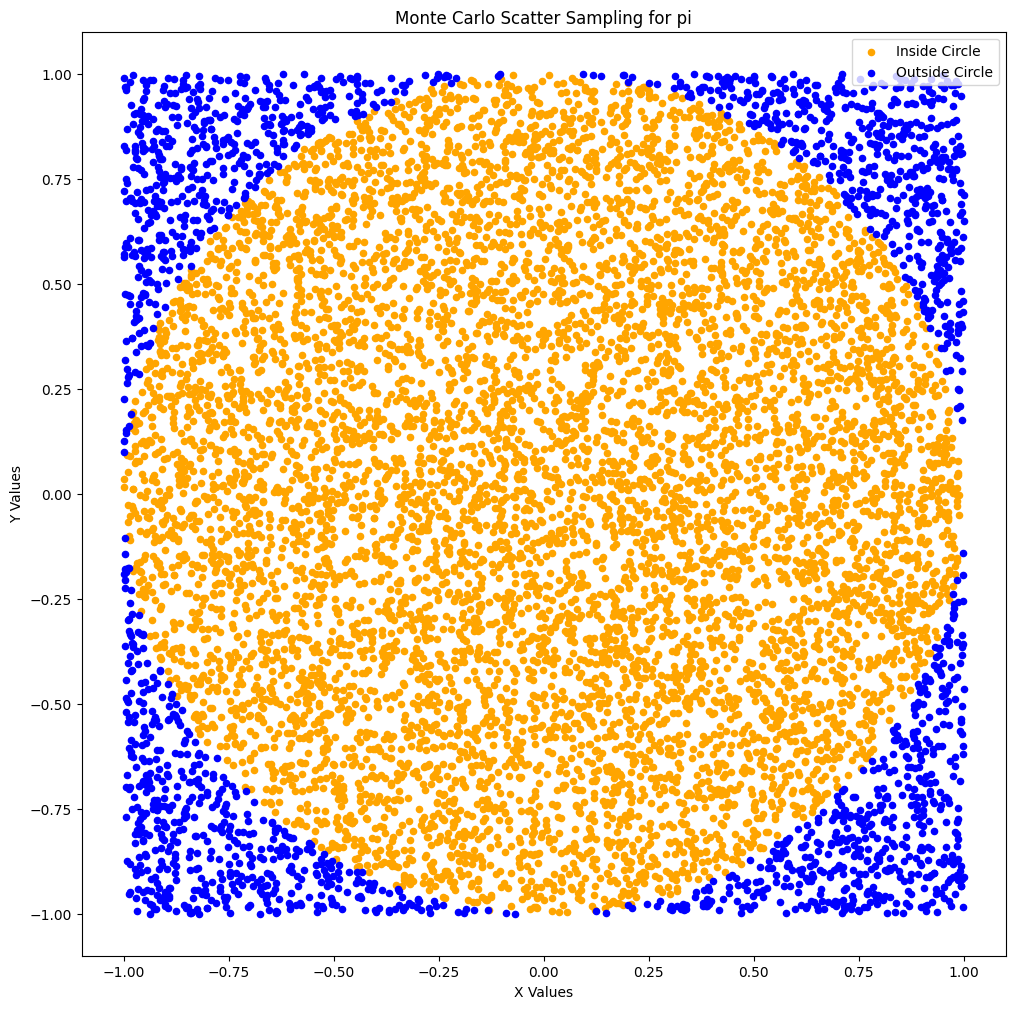

In [118]:
import numpy as np
import matplotlib.pyplot as plt

#Part 1

rand_x = np.random.uniform(-1, 1, 10000)
rand_y = np.random.uniform(-1, 1, 10000)

#Part 2

pts_total = 0
pts_inside = 0

pi_array = np.zeros(len(rand_x))

def update_pi(x, y, pts_total, pts_inside):
    pts_total += 1
    if x*x + y*y <= 1:
        pts_inside += 1
    pi_estimate = 4 * pts_inside / pts_total
    return pts_total, pts_inside, pi_estimate

for i in range(len(rand_x)):
    pts_total, pts_inside, pi_array[i] = update_pi(rand_x[i], rand_y[i], pts_total, pts_inside)

fig1, ax = plt.subplots(figsize=(12,12))

iterations = np.array(range(10000))

ax.plot(iterations, pi_array, label='Estimated Pi Value')
ax.plot(iterations, [np.pi]*len(rand_x), label='Actual Pi Value')

ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Estimated Value of Pi')

ax.legend()
ax.set_title('Monte Carlo Line Sampling for pi')
plt.show()

#Part 3
xy_points = np.column_stack((rand_x, rand_y))
mask = (rand_x*rand_x + rand_y*rand_y) <= 1

points_inside = xy_points[mask]
points_outside = xy_points[~mask]

fig2, ax2 = plt.subplots(figsize=(12,12))

ax2.scatter(points_inside[:,0], points_inside[:,1], s=20, color='orange', label='Inside Circle')
ax2.scatter(points_outside[:,0], points_outside[:,1], s=20, color='blue', label='Outside Circle')

ax2.set_xlabel('X Values')
ax2.set_ylabel('Y Values')

ax2.set_aspect('equal')
ax2.legend()
ax2.set_title('Monte Carlo Scatter Sampling for pi')
plt.show()


#### Problem 2: Simulating a 2-D random walk

Start at the position (0,0). Iterate through n steps. For each step randomly choose to step left, right, up, or down.

1. Track your x and y position after each step and use matplotlib step() to plot your path as a function of time.

2. After n steps calculate your distance from the origin using the formula $r=\sqrt{x^2+y^2}$.

3. Include in your code the ability to complete many trials (for example you can take n steps 100 times). Make a histogram plot showing the the distance from the origin r for each trial. Calculate the average distance from the origin for all trials.

4. Make a plot of the average distance from the origin after n steps and m trials as a function of n.